In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv(r'C:\Users\fabio\OneDrive\Desktop\WCA export\WCA_export134_20250514T000140Z.tsv\WCA_export_Results.tsv', sep='\t')


In [128]:
df.columns

Index(['pos', 'best', 'average', 'value1', 'value2', 'value3', 'value4',
       'value5', 'competitionId', 'eventId', 'roundTypeId', 'personName',
       'personId', 'formatId', 'regionalSingleRecord', 'regionalAverageRecord',
       'personCountryId'],
      dtype='object')

In [129]:
my_df = df[df['personId'] == '2014SCHW02']

fmc_df = my_df[my_df['eventId'] == '333fm']

fmc = fmc_df[['value1','value2','value3']]

fmc_results = fmc[fmc > 0].stack().values

#print(fmc_results)
#fmc_df.head()

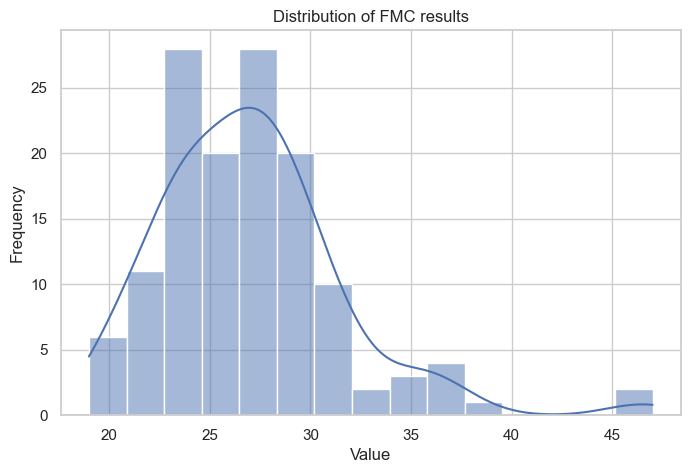

In [130]:
plt.figure(figsize=(8,5))
sns.histplot(fmc_results, bins=15, kde=True)
plt.title("Distribution of FMC results")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

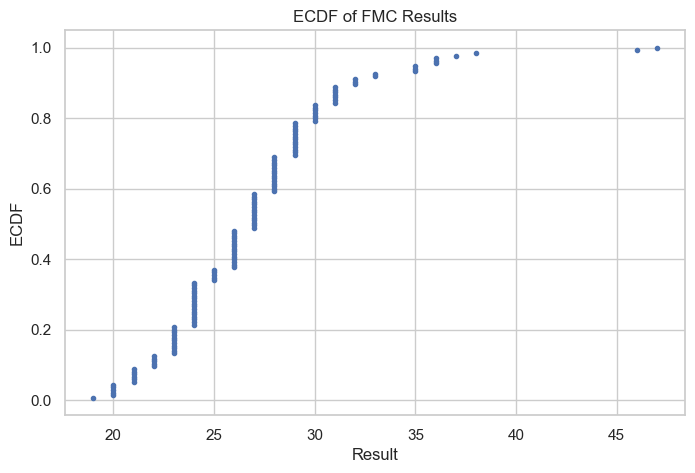

In [131]:
sorted_vals = np.sort(fmc_results)
ecdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)

plt.figure(figsize=(8,5))
plt.plot(sorted_vals, ecdf, marker='.', linestyle='none')
plt.title("ECDF of FMC Results")
plt.xlabel("Result")
plt.ylabel("ECDF")
plt.show()

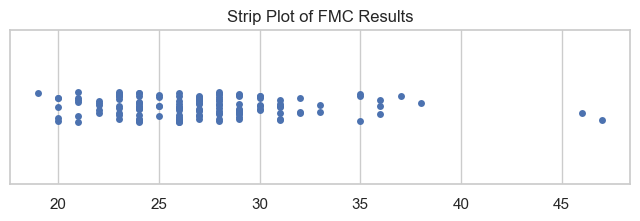

In [167]:
plt.figure(figsize=(8,2))
sns.stripplot(x=fmc_results, jitter=True)
plt.title("Strip Plot of FMC Results")
plt.show()

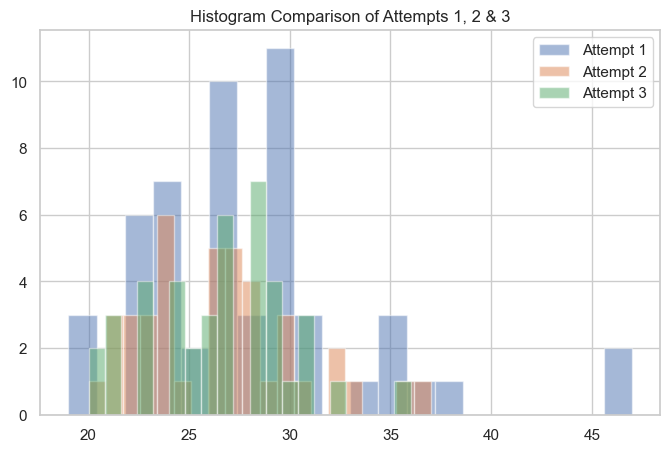

In [139]:
val1 = fmc_df['value1']
val2 = fmc_df['value2']
val3 = fmc_df['value3']

val1 = val1[val1>0]
val2 = val2[val2>0]
val3 = val3[val3>0]
plt.figure(figsize=(8,5))
plt.hist(val1, bins=20, alpha=0.5, label='Attempt 1')
plt.hist(val2, bins=20, alpha=0.5, label='Attempt 2')
plt.hist(val3, bins=20, alpha=0.5, label='Attempt 3')
plt.legend()
plt.title("Histogram Comparison of Attempts 1, 2 & 3")
plt.show()

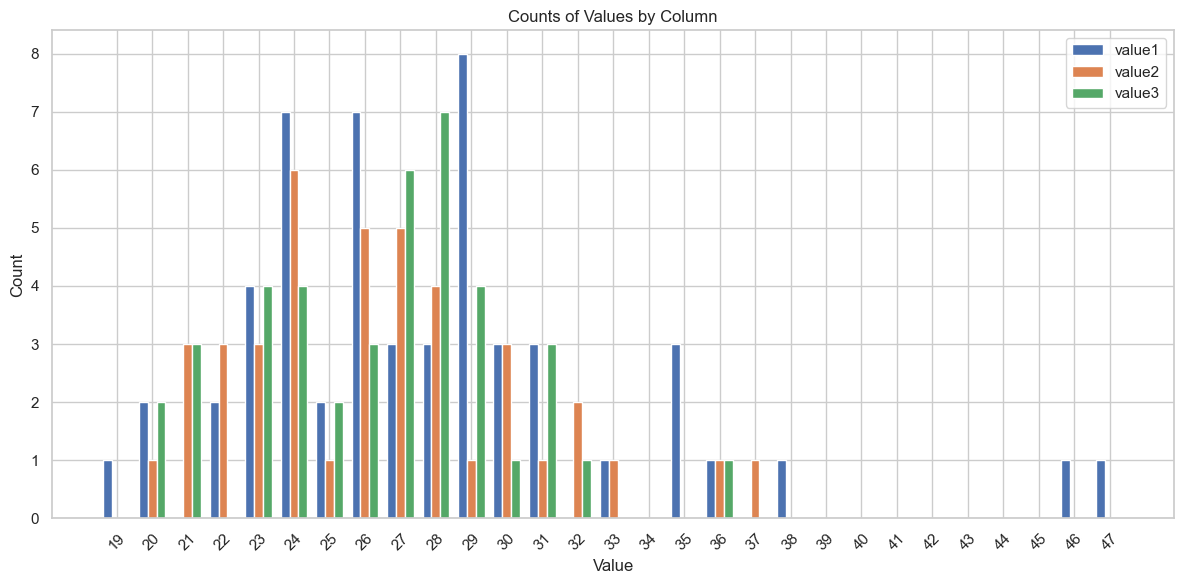

In [169]:
val1_filtered = fmc_df['value1'][fmc_df['value1'] >= 1]
val2_filtered = fmc_df['value2'][fmc_df['value2'] >= 1]
val3_filtered = fmc_df['value3'][fmc_df['value3'] >= 1]

# Get value counts and sort by value
val1_counts = val1_filtered.value_counts().sort_index()
val2_counts = val2_filtered.value_counts().sort_index()
val3_counts = val3_filtered.value_counts().sort_index()

full_index = pd.Index(range(19, 48)) 

val1_counts = val1_counts.reindex(full_index, fill_value=0)
val2_counts = val2_counts.reindex(full_index, fill_value=0)
val3_counts = val3_counts.reindex(full_index, fill_value=0)


counts_df = pd.DataFrame({
    'value1': val1_counts,
    'value2': val2_counts,
    'value3': val3_counts
})


labels = counts_df.index.astype(str)
x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width, counts_df['value1'], width, label='value1')
ax.bar(x, counts_df['value2'], width, label='value2')
ax.bar(x + width, counts_df['value3'], width, label='value3')

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Counts of Values by Column')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

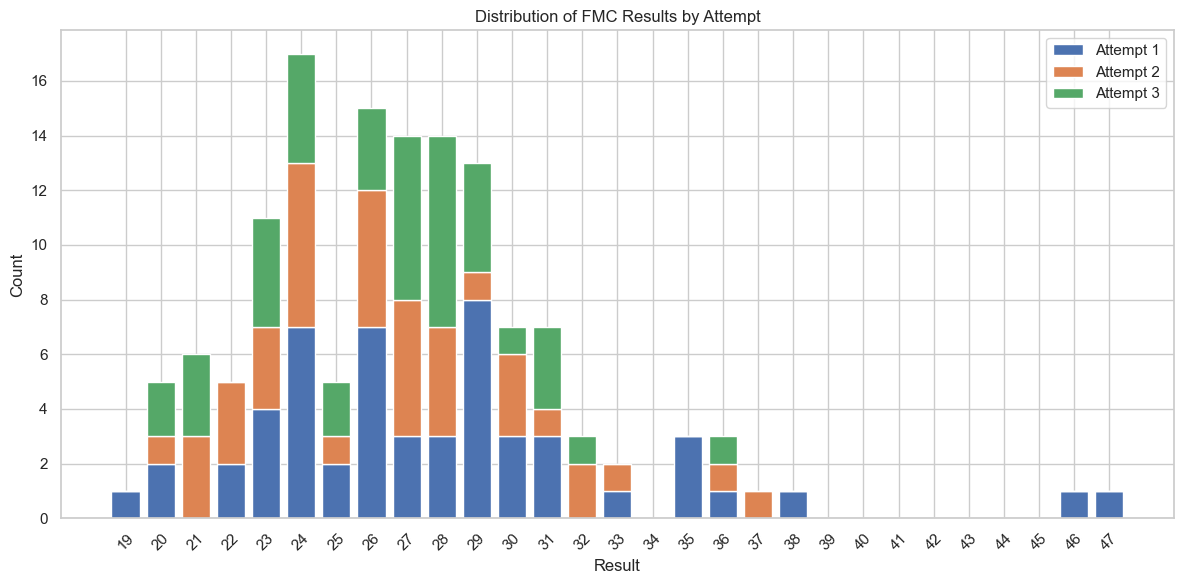

In [168]:
labels = counts_df.index.astype(str)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12,6))

p1 = ax.bar(x, counts_df['value1'], label='Attempt 1')
p2 = ax.bar(x, counts_df['value2'], bottom=counts_df['value1'], label='Attempt 2')
p3 = ax.bar(x, counts_df['value3'], bottom=counts_df['value1'] + counts_df['value2'], label='Attempt 3')

ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Distribution of FMC Results by Attempt')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


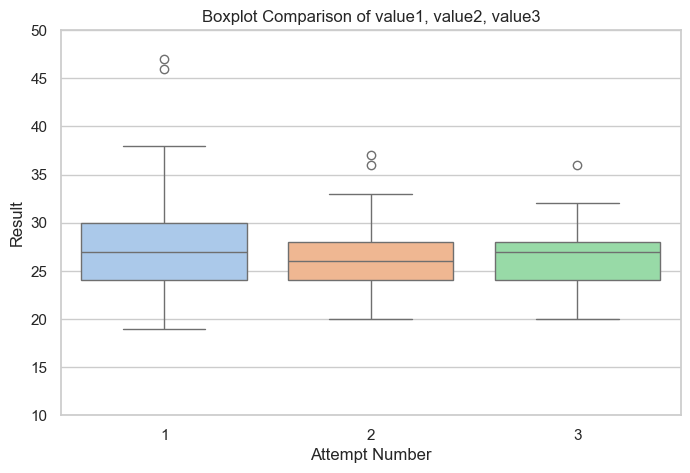

In [163]:
df_melt = pd.melt(fmc_df[['value1','value2','value3']], var_name='variable', value_name='value')


df_melt_clean = df_melt[(df_melt['value'] != 0) & (df_melt['value'] != -1)]

df_melt_clean.loc[:, 'variable'] = df_melt_clean['variable'].replace({
    'value1': '1',
    'value2': '2',
    'value3': '3'
})

plt.figure(figsize=(8,5))
ax = sns.boxplot(x='variable', y='value', data=df_melt_clean, hue = 'variable', palette = 'pastel')
plt.title("Boxplot Comparison of value1, value2, value3")
plt.xlabel("Attempt Number")
plt.ylabel("Result")
plt.ylim(10,50)
plt.show()